In [1]:
import matplotlib.pyplot as plt
import statistics as sta
import pandas as pd 
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("mtcars.csv")

In [3]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
df2 = df.corr()
df2

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, mpg to carb
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     11 non-null     float64
 1   cyl     11 non-null     float64
 2   disp    11 non-null     float64
 3   hp      11 non-null     float64
 4   drat    11 non-null     float64
 5   wt      11 non-null     float64
 6   qsec    11 non-null     float64
 7   vs      11 non-null     float64
 8   am      11 non-null     float64
 9   gear    11 non-null     float64
 10  carb    11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [6]:
df2.index

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [7]:
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(data=df2)
# plt.show()

In [8]:
# fig, ax = plt.subplots(figsize=(10,10))
# plt.imshow(df2)

# tickvalues = df2.index
# labellist = df2.index
# plt.xticks(ticks=tickvalues, labels=labellist, rotation = 'vertical')
# plt.yticks(df2.index)

# fig.tight_layout()
# plt.show()

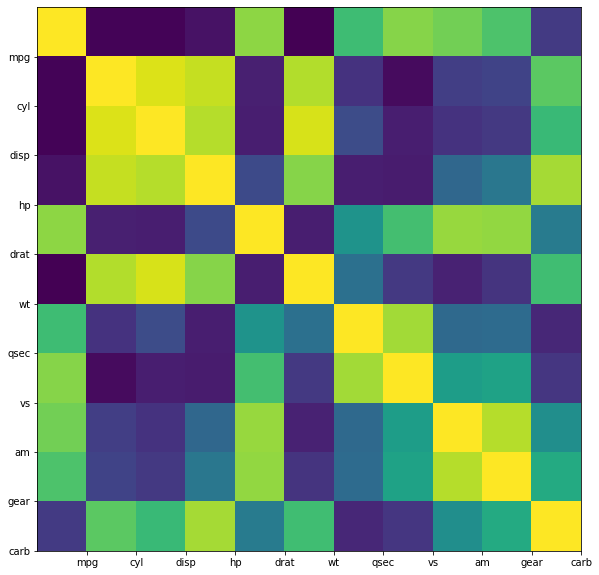

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(df2)
ax.set_xticks(np.arange(0.5, len(df2.index), 1), df2.index)
ax.set_yticks(np.arange(0.5, len(df2.columns), 1), df2.columns)
ax.set_xticklabels(df2.index)
ax.set_yticklabels(df2.columns)
plt.show()

In [10]:
df3 = pd.read_csv("none.csv", index_col="id")
df3

,col 9,col 8,col7,col6,col5,col4,col3,col2,col1
id,,,,,,,,,
row1,-3,-2,-1,0,1,2,-3,0,1
row2,-2,-1,0,1,2,-3,-2,0,1
row3,-1,0,1,2,-3,-2,-1,1,1
row4,0,1,2,0,-2,-1,0,1,0
row5,1,2,-3,1,-1,0,1,0,0
row6,2,-2,-2,2,0,1,2,1,0
row7,0,-1,-1,-3,1,2,0,0,0
row8,1,0,0,-2,2,1,1,1,0
row9,2,1,1,-1,0,1,2,0,1


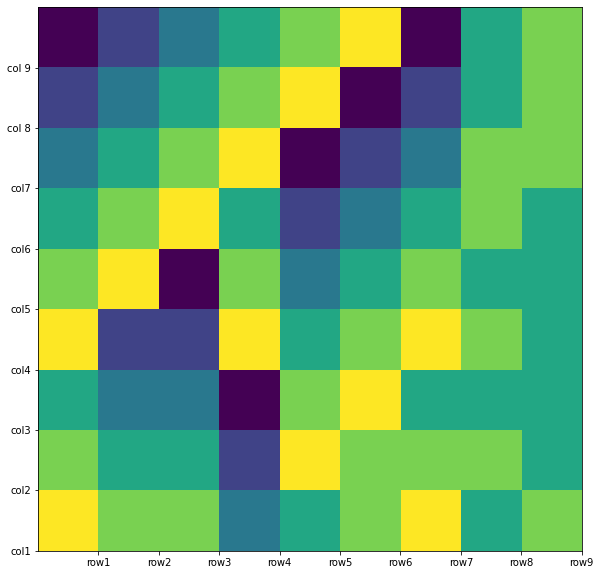

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(df3)
ax.set_xticks(np.arange(0.5, len(df3.index), 1), df3.index)
ax.set_yticks(np.arange(0.5, len(df3.columns), 1), df3.columns)
ax.set_xticklabels(df3.index)
ax.set_yticklabels(df3.columns)
plt.show()